In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from tqdm import tqdm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
%matplotlib inline

In [51]:
#Импортируем необходимые данные
training = pd.read_excel('A1.xlsx', sheet_name='Training')
validate = pd.read_excel('A1.xlsx', sheet_name='Validate', index_col='ID')

In [3]:
training.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.0,NaN,NaN,10,0,1.02273,1.01608,1.55268,...,831.68333,783.81667,171.33333,818.15000,0.62772,0.13333,0.00000,6.41893,0.97122,6.41893
1,342,0,0.0,30.00000,6.80153,0,0,1.00000,1.65348,1.14852,...,195.13889,168.30000,81.00000,NaN,6.32407,0.26667,0.33333,NaN,1.60714,3.44800
2,631,0,0.0,30.00000,9.60267,0,0,1.00000,0.84143,NaN,...,226.10556,207.41667,110.00000,184.49444,2.25635,0.00000,0.06667,NaN,0.75000,8.08000
3,1165,0,0.0,30.33333,15.32553,0,0,0.98901,0.88114,NaN,...,567.53889,441.52778,194.00000,625.32222,2.74469,0.13333,0.40000,13.50400,0.98119,13.50400
4,1469,0,0.0,28.00000,7.54133,0,0,0.92857,1.21447,0.60138,...,154.80556,86.64444,71.66667,53.45000,0.91130,0.46667,0.40000,NaN,0.40171,3.44800


## Предподготовка данных

In [4]:
#Проверяем датафрейм на наличие пропущенных значений
training.isnull().sum()

ID           0
Target       0
P1           0
P2        1508
P3        1477
P4           0
P5           0
P6           0
P7           0
P8        1518
P9           0
P10          0
P11          0
P12          0
P13          0
P14          0
P15          0
P16       1525
P17          0
P18          0
P19          0
P20          0
P21          0
P22          0
P23          0
P24          0
P25       1504
P26          0
P27          0
P28          0
P29       1533
P30          0
P31          0
dtype: int64

In [5]:
#Датафрейм с предикторами
X = training.drop(['ID', 'Target'], axis=1)

In [6]:
#Датафрейм с целевой переменной
y = training.Target

In [7]:
X.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
count,10000.000000,8492.000000,8523.000000,10000.000000,10000.000000,10000.000000,10000.000000,8482.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,8496.000000,10000.000000,10000.000000,10000.000000,8467.000000,10000.000000,10000.000000
mean,1.032911,24.972718,14.497498,2.329800,0.079200,0.950521,0.993450,0.875107,9.984656,25.943533,...,254.005455,204.907409,124.197333,268.877144,1.683967,0.183617,0.179254,9.048853,0.973444,10.625063
std,3.977033,7.537203,10.703977,5.754871,0.270064,0.217456,0.223170,0.524680,62.804927,24.575361,...,299.695057,263.099484,137.442492,355.736543,1.997374,0.189519,0.194499,5.529335,0.528715,6.688086
min,0.000000,1.000000,0.723030,0.000000,0.000000,0.048390,0.000000,0.000000,0.000000,0.333330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.333330,8.004265,0.000000,0.000000,0.939760,0.916912,0.592615,0.000000,11.333330,...,52.851392,33.952780,33.000000,47.193053,0.507607,0.000000,0.000000,4.320000,0.750000,5.096000
50%,0.000000,28.666670,12.532000,0.000000,0.000000,0.989010,0.997990,0.883840,0.338890,19.333330,...,150.805555,110.519445,83.166665,146.880555,1.194580,0.133330,0.133330,9.115600,1.000000,9.536000
75%,0.000000,30.333330,18.522270,1.000000,0.000000,1.000000,1.048620,1.129363,4.344440,33.000000,...,348.923610,274.991665,167.000000,346.656943,2.146517,0.266670,0.266670,9.920000,1.216220,14.456000
max,66.666670,30.333330,287.935870,30.000000,1.000000,2.437500,2.763270,3.000000,3313.494440,647.000000,...,3803.522220,3043.930670,1625.333330,5339.972220,26.899270,1.000000,1.000000,96.288000,7.246720,97.352000


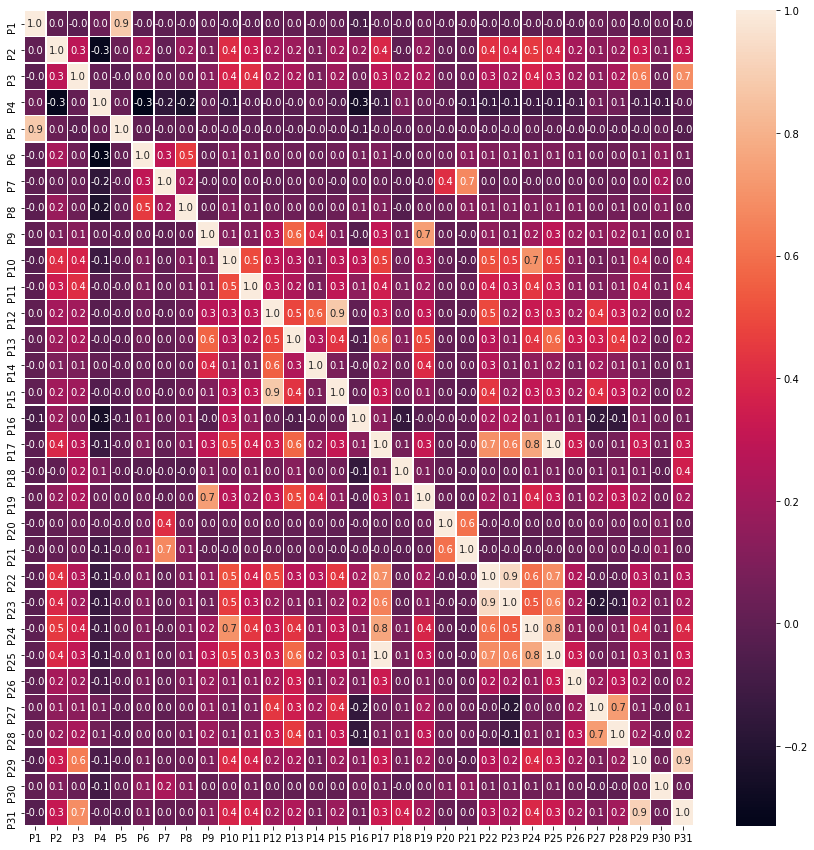

In [8]:
#Проверяем датафрейм с предикторами на наличие корреляции
rcParams['figure.figsize'] = 15, 15
sns.heatmap(X.corr(), annot=True, fmt=".1f", linewidths=.5)

In [9]:
#С учетом корреляции (> 0.8) и наличия нулевых значений удаляем некоторые предикторы
X = X.drop(['P5', 'P15', 'P25', 'P29'], axis=1)

In [10]:
#Для оставшихся предикторов заполняем отсутствующие значения медианными по данному параметр
X = X.fillna({'P2': X.P2.median(),
              'P3': X.P3.median(),
              'P8': X.P8.median(),
              'P16': X.P16.median()})

In [11]:
#Разбиваем датафреймы на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Подготовка и настройка модели RandomForestClassifier

Мною были проверены KNeighborsClassifier, GradientBoostingClassifier, LogisticRegression. Остановидлся на RandomForestClassifier, как на моделе, получиший наибольшую точность

In [18]:
parametrs = {'n_estimators': range(100, 2000, 100),
             'criterion':['entropy'],
             'max_depth': range(20, 100, 10), 
             'max_features':['sqrt'],
             'min_samples_leaf':range(1, 40, 5),
             'min_samples_split':range(1, 20, 5),
             'bootstrap': [True]}

In [19]:
#Подбор гиперпараметров с помощью RandomizedSearchCV и построение модели RandomForestClassifier
clf = RandomForestClassifier()
grid_search_cv_clf = RandomizedSearchCV(clf, parametrs, cv=5, n_jobs = -1)
grid_search_cv_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [20]:
#Лучшие гиперпараметры
grid_search_cv_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [59]:
#Точность классификатора
best_cls = grid_search_cv_clf.best_estimator_
print(f'Accuracy на тренировочных данных равна  {best_cls.score(X_train, y_train)}')
print(f'Accuracy на тестовых данных равна  {best_cls.score(X_test, y_test)}')

Accuracy на тренировочных данных равна  0.9529850746268657
Accuracy на тренировочных данных равна  0.6918181818181818


In [61]:
#Precision и Recall
y_pred = best_cls.predict(X_test)

print(f'Precision равен {precision_score(y_test, y_pred)}')
print(f'Recall равен {recall_score(y_test, y_pred)}')

Precision равен 0.6785079928952042
Recall равен 0.7074074074074074


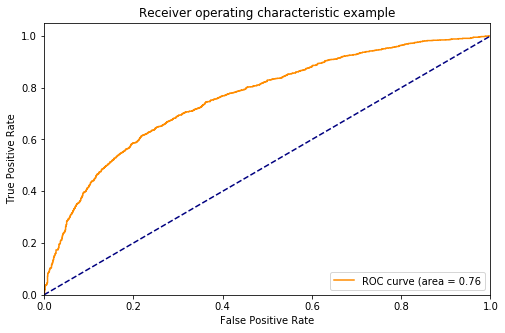

In [31]:
#Построение ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {round(roc_auc, 2)}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Наиболее важные предикторы

In [32]:
feature_importance = best_cls.feature_importances_

In [63]:
feature_importances_df = pd.DataFrame({'Предиктор':list(X_train.columns), 
                                       'Балл':  best_cls.feature_importances_})\
                        .sort_values(by='Балл', ascending = False)

In [64]:
#3 наиболее важных предиктора
feature_importances_df.head(3)

,Предиктор,Балл
13,P16,0.088649
20,P23,0.073587
8,P10,0.065029


## Предподготовка предикторов и прогноз целевого значения Target

In [35]:
#Проверяем целевой датафрейм на наличие пропущенных значений
validate.isnull().sum()

Target    20000
P1            0
P2         2968
P3         2979
P4            0
P5            0
P6            0
P7            0
P8         3015
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16        3003
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25        3021
P26           0
P27           0
P28           0
P29        3013
P30           0
P31           0
dtype: int64

In [52]:
X_val = validate.drop(['Target', 'P5', 'P15', 'P25', 'P29'], axis=1)

In [53]:
X_val = X_val.fillna({'P2': X.P2.median(),
              'P3': X.P3.median(),
              'P8': X.P8.median(),
              'P16': X.P16.median()})

In [54]:
y_val = best_cls.predict(X_val)

In [56]:
validate['Target'] = y_val

In [65]:
#Готовый датафрейм с предсказанными значениями Target
validate.head(10)

,Target,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
ID,,,,,,,,,,,,,,,,,,,,,
127,1,0.0,30.33333,8.86883,0,0,0.98901,1.01885,1.31226,32.55556,...,85.59444,32.45000,41.00000,95.39444,4.64779,0.40000,0.73333,8.256,0.11725,8.25600
214,0,0.0,30.33333,12.82570,0,0,0.98901,0.96587,0.94475,2.72222,...,809.37778,787.77778,164.66667,239.95000,2.34907,0.00000,0.00000,4.320,1.33333,10.00000
542,1,0.0,9.00000,5.25643,0,0,0.88889,0.97863,1.68000,0.43333,...,26.34444,25.89444,1.33333,1.26667,0.43333,0.13333,0.06667,5.096,1.16688,5.09600
674,1,0.0,24.33333,NaN,0,0,0.90411,0.88409,0.58490,2.07778,...,116.31111,73.20000,27.33333,34.62222,0.69722,0.33333,0.13333,4.712,1.80000,4.71200
756,0,0.0,30.33333,21.90167,0,0,0.98901,1.02636,1.30082,42.82778,...,275.16111,201.13889,285.00000,369.42778,1.36109,0.13333,0.13333,21.096,0.00000,21.09600
805,0,0.0,30.33333,10.09120,0,0,0.98901,1.07570,0.88254,0.00000,...,633.15000,432.63889,170.66667,989.90556,2.07884,0.33333,0.00000,9.536,0.80128,9.53600
1548,0,0.0,30.33333,13.56817,0,0,0.98901,1.00378,1.01119,0.00000,...,956.70556,911.95000,578.33333,851.60556,0.91704,0.00000,0.00000,9.536,1.19099,13.50400
2234,0,0.0,30.33333,NaN,0,0,0.98901,1.19615,1.12177,19.39444,...,946.48889,619.83889,405.66667,963.84444,1.27491,0.33333,0.00000,9.536,1.36735,14.45600
2553,0,0.0,NaN,23.35350,0,0,0.98901,1.13630,1.26323,1.99444,...,415.70000,279.30000,306.66667,626.82778,2.73820,0.40000,0.40000,21.600,1.12500,23.19733


In [66]:
#Сохраняем датафрейм в Excel-файл
validate.to_excel('Validate_predict.xlsx')